# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

K-Means Clustering adalah salah satu algoritma unsupervised learning yang paling populer dalam bidang data mining dan machine learning. Tujuan dari algoritma ini adalah untuk mengelompokkan sekumpulan data ke dalam sejumlah kelompok (cluster) berdasarkan kemiripan atau kedekatan karakteristiknya.
Disebut “K-Means” karena:

- K adalah jumlah cluster yang ingin dibentuk (ditentukan oleh pengguna),
dan Means merujuk pada metode rata-rata (mean) yang digunakan untuk menemukan pusat dari setiap cluster.


## **Manfaat *Clustering***
**1. Menemukan Pola Tersembunyi dalam Data**

Clustering membantu mengidentifikasi pola-pola alami dalam data yang tidak terlihat secara eksplisit. Ini berguna dalam eksplorasi data awal (exploratory data analysis).

**2. Segmentasi Data**

Clustering digunakan untuk membagi data besar menjadi kelompok-kelompok lebih kecil yang memiliki karakteristik serupa, misalnya:

- Segmentasi pelanggan berdasarkan perilaku belanja

- Segmentasi pasar atau wilayah geografis

**3. Reduksi Dimensi dan Ringkasan Data**

Dengan mengelompokkan data ke dalam beberapa cluster, kita bisa meringkas data yang besar dan kompleks menjadi representasi yang lebih sederhana (cluster centroid).

**4. Peningkatan Efisiensi Sistem**

Dalam sistem pencarian, rekomendasi, atau kompresi data, clustering dapat meningkatkan efisiensi karena hanya perlu memperhatikan representasi cluster, bukan seluruh dataset.

**5. Preprocessing untuk Algoritma Lain**

Clustering sering digunakan sebagai tahapan awal (preprocessing) untuk algoritma lain seperti:

- Classification (klasifikasi)

- Anomaly Detection (deteksi anomali)

- Recommendation System

## **Inertia (Sum Square error/SSE)**


Dalam konteks algoritma *K-Means Clustering*, *inertia* (Sum Square error/SSE) adalah salah satu metrik evaluasi untuk menilai seberapa baik data dikelompokkan ke dalam klaster serta mengukur jumlah total jarak kuadrat antara setiap titik data dan pusat klaster (centroid) tempat titik tersebut.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Silhouette Analysis adalah metrik evaluasi lain yang lebih baik dari inertia dalam banyak kasus untuk mengevaluasi hasil clustering, seperti pada K-Means, karena mempertimbangkan dua hal sekaligus yaitu:

- Kepadatan dalam klaster

- Jarak antar klaster

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Implementasi dengan menggunakan data Iris**

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.8 MB/s eta 0:00:00


## **Library yang digunakan**

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Pengumpulan Data**

In [4]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-292ef6f0-postgesql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_iFCt7xp02vTczdlhooY",
        database="defaultdb",
        port=16905
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM firmandani.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Fungsi untuk mengambil data dari MySQL
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-ef66224-mmsql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_NrOpqQJhytxwdcC6shv",
        database="defaultdb",
        port=21910
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM flowers")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal length  petal width  sepal length  sepal width
  1     Iris-setosa           1.3          0.2           5.1          3.5
  2     Iris-setosa         122.0        123.0         223.0        121.0
  3     Iris-setosa         234.0        241.0         121.0        142.0
  4     Iris-setosa         210.0        423.0         135.0       1423.0
  5     Iris-setosa         233.0        230.0         123.0        241.0
  6     Iris-setosa         201.0        221.0         521.0        123.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.0          0.2           5.0          3.4
  9     Iris-setosa           4.0          0.2           5.0          2.9
 10     Iris-setosa           1.5          0.3           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.3           4.8          3.4
 13     Iris-setosa           4.3     

## **Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4**

In [5]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.28297728 -0.19494245 -0.31250581 -0.30912184]
 [ 2.5467955   1.75448205  2.8125523   2.78209656]]
Akurasi (Adjusted Rand Score): -0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.28297728 -0.19494245 -0.31250581 -0.30912184]
 [ 2.60575987  1.08079046  2.79360223  2.60307131]
 [ 1.72129425 11.18616424  3.07785329  5.28845   ]]
Akurasi (Adjusted Rand Score): -0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.28297728 -0.19494245 -0.31250581 -0.30912184]
 [ 1.50599669  1.1762565   3.25257373  2.73885687]
 [ 1.72129425 11.18616424  3.07785329  5.28845   ]
 [ 4.07211078  0.95350241  2.18164023  2.42202389]]
Akurasi (Adjusted Rand Score): -0.003


## **Model Plotting dengan Jumlah Cluster 2, 3 dan 4**

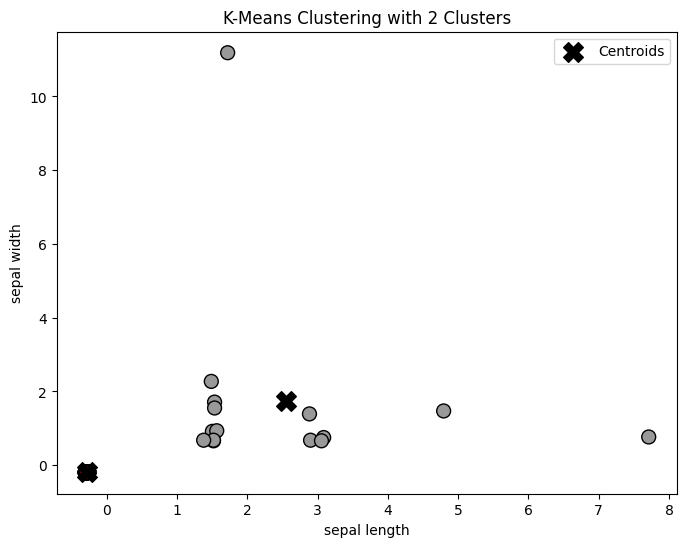

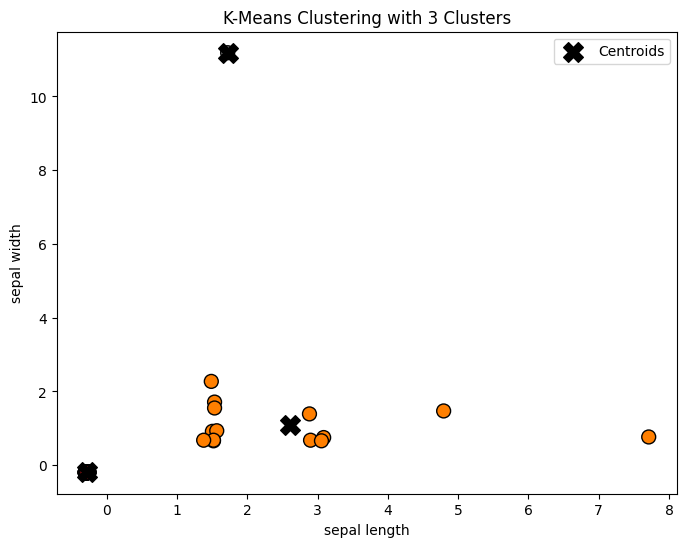

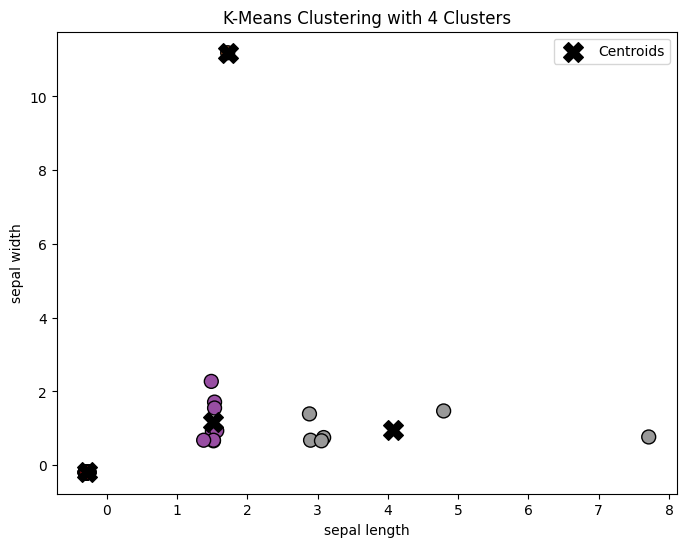

In [6]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## **Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4**

In [7]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.28297728 -0.19494245 -0.31250581 -0.30912184]
 [ 2.5467955   1.75448205  2.8125523   2.78209656]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [-0.29435637 -0.19132673 -0.3540672  -0.32231369]), Klaster: 0, Centroid: [-0.28297728 -0.19494245 -0.31250581 -0.30912184], Jarak kuadrat: 0.002, Inertia sementara: 0.002
Titik data 2 (Fitur: [3.08678504 0.7504522  1.63075697 1.30730263]), Klaster: 1, Centroid: [2.5467955  1.75448205 2.8125523  2.78209656], Jarak kuadrat: 4.871, Inertia sementara: 4.873
Titik data 3 (Fitur: [1.50405708 0.91877013 3.47251592 2.8732206 ]), Klaster: 1, Centroid: [2.5467955  1.75448205 2.8125523  2.78209656], Jarak kuadrat: 2.230, Inertia sementara: 7.103
Titik data 4 (Fitur: [ 1.72129425 11.18616424  3.07785329  5.28845   ]), Klaster: 1, Centroid: [2.5467955  1.75448205 2.8125523  2.78209656], Jarak kuadrat: 95.990, Inertia sementara: 103.093
Titik data 5 (Fitur: [1.535

## **Model Plotting Diagram Elbow Method**

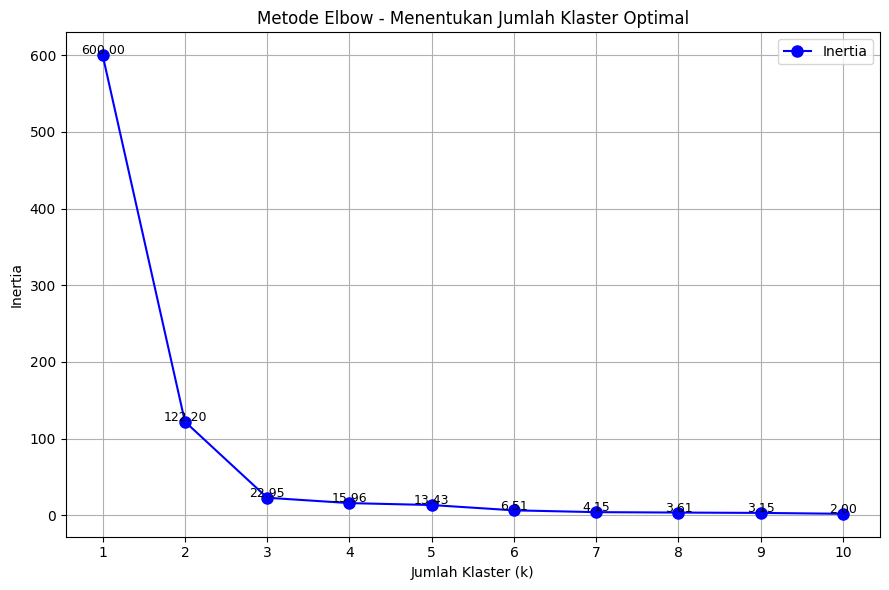

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## **Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4**


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.2349652  -0.19808718 -0.25711389 -0.25878331]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]]
Silhouette Score untuk 2 klaster: 0.898

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.32632653 -0.32750871 -0.2904267  -0.26588017]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]
 [ 2.23179089  3.29629394  0.64233207 -0.067168  ]]
Silhouette Score untuk 3 klaster: 0.913

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.32632653 -0.32750871 -0.2904267  -0.26588017]
 [ 3.28752578  2.77721349  4.14265371  4.25851683]
 [ 2.23179089  3.29629394  0.64233207 -0.067168  ]
 [ 3.29149969  2.76922764  3.0565352   2.98741582]]
Silhouette Score untuk 4 klaster: 0.895

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.913)


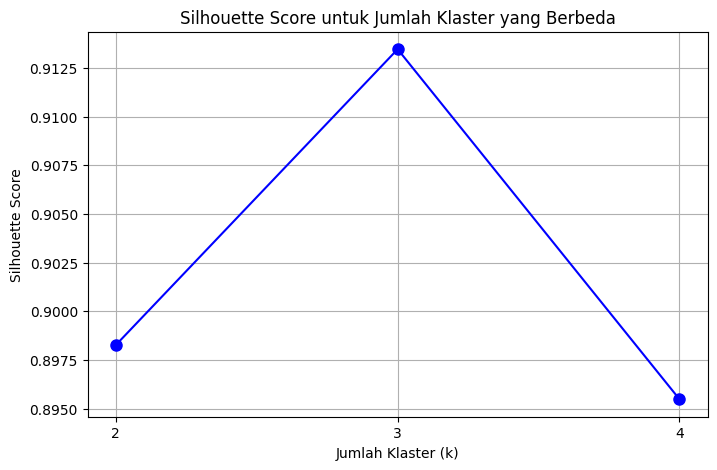

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()